## Semaine 5 : r√©solution de syst√®mes non lin√©aires et introduction √† la diff√©rentiation automatique

In [1]:
using LinearAlgebra, Plots, Polynomials

### <font color='green'> Syst√®me non lin√©aire</font>

### <font color='orange'>[Exercice 1]</font> Newton-Raphson en dimension 2

On consid√®re le syst√®me non lin√©aire suivant
$$
\left \{
    \begin{aligned}
        &y = (x-1)^2 \\
        &x^2 + y^2 = 4
    \end{aligned}
\right.
$$

1. Tracer des graphiques appropri√©s pour visualiser grossi√®rement la (les) zone(s) contenant une (des) solution(s)


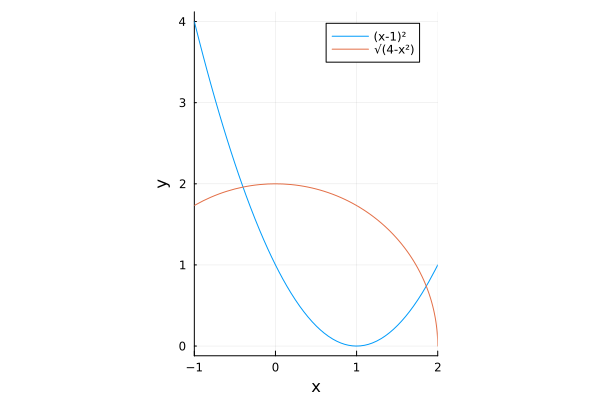

In [2]:
### BEGIN SOLUTION
plot(x->(x-1)^2, xlim=(-1,2), xlabel="x", ylabel="y", label="(x-1)¬≤")
plot!(x->‚àö(4-x^2), label="‚àö(4-x¬≤)", aspect_ratio=:equal)
### END SOLUTION

2. Impl√©menter un algorithme de Newton-Raphson pour calculer une approximation de cette (ces) solution(s) en prenant soin de retourner non seulement la solution mais √©galement l'ensemble des it√©rations (pour √©viter de se retrouver plus tard face au calcul d'un logarithme de 0, attention √† ne pas inclure dans l'ensemble des it√©rations la derni√®re valeur cens√©e √™tre la meilleure approximation de la solution et qui doit √™tre retourn√©e ind√©pendamment). L'algorithme devra √™tre suffisamment g√©n√©rique pour traiter aussi bien des cas scalaires que vectoriels.

In [3]:
function newton_raphson(x, f, J·∂†, maxiter = 100; Œµ = 1e-12)
    ### BEGIN SOLUTION
    lx = typeof(x)[]
    for i in 1:maxiter
        x -= J·∂†(x)\f(x)
        norm(f(x)) < Œµ && return x, lx
        push!(lx, x)
    end
    ### END SOLUTION
    return "Failed to converge!"
end

newton_raphson (generic function with 2 methods)

In [4]:
x, lx = newton_raphson(1., x->x^2-4, x->2x, 100 ; Œµ = 1e-12)
@assert  x ‚âà 2.
@assert  all(lx .‚âà [2.5, 2.05, 2.000609756097561, 2.0000000929222947])

x, lx = newton_raphson([1.,1.], x->[x[1]^2-4, x[2]^2-9], x->2Diagonal(x), 100 ; Œµ = 1e-12)
@assert  all(x .‚âà [2.0, 3.0])
@assert  all(lx .‚âà [[2.5, 5.0], [2.05, 3.4], [2.000609756097561, 3.023529411764706], [2.0000000929222947, 3.00009155413138], [2.000000000000002, 3.000000001396984]])

3. Tracer l'√©volution de l'erreur en fonction de l'it√©ration pour la (les) solution(s) en utilisant une √©chelle appropri√©e en y. On pourra estimer qu'une solution donn√©e est fournie par la valeur finale de l'algorithme.

[-0.39986411042698694, 1.9596195276615394]
[1.8589441280924195, 0.7377850151844467]


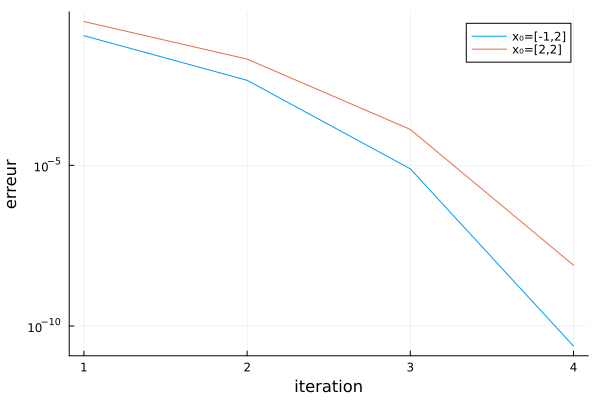

In [5]:
### BEGIN SOLUTION
f(X) = begin x, y = X ; [y-(x-1)^2, x^2+y^2-4] end
J·∂†(X) = begin x, y = X ; [-2(x-1) 1 ; 2x 2y] end

x1, lx1 = newton_raphson([-1.,2.], f, J·∂†) ; println(x1)
err1 = norm.([y-x1 for y in lx1])
plot(err1, yaxis=:log10, xlabel="iteration", ylabel="erreur", label="x‚ÇÄ=[-1,2]")
x2, lx2 = newton_raphson([2.,2.], f, J·∂†) ; println(x2)
err2 = norm.([y-x2 for y in lx2])
plot!(err2, label="x‚ÇÄ=[2,2]")
### END SOLUTION

4. Estimer l'ordre de convergence i.e. $q$ tel que $\lim_{k\to\infty} \frac{\lVert \mathbf{x}_{k+1}-\mathbf{x}_*\rVert}{\lVert \mathbf{x}_{k}-\mathbf{x}_*\rVert^q} ‚àà \mathbb{R}^*_+$ pour la (les) solution(s). On pourra pour cela utiliser le vecteur `logerr` des logarithmes des erreurs successives et construire le polyn√¥me de degr√© 1 associant $\log{\lVert \mathbf{x}_{k}-\mathbf{x}_*\rVert }$ √† $\log{\lVert \mathbf{x}_{k+1}-\mathbf{x}_*\rVert }$ en consid√©rant les sous-vecteurs `logerr[1:end-1]` et `logerr[2:end]`.

In [6]:
### BEGIN SOLUTION
logerr1 = log10.(err1)
@show fit(logerr1[1:end-1], logerr1[2:end], 1)
logerr2 = log10.(err2)
@show fit(logerr2[1:end-1], logerr2[2:end], 1)
### END SOLUTION

fit(logerr1[1:end - 1], logerr1[2:end], 1) = Polynomial(-0.41763488292819584 + 1.9968058815394591*x)
fit(logerr2[1:end - 1], logerr2[2:end], 1) = Polynomial(-0.6705998699925872 + 1.9121170573245703*x)


Polynomial(-0.6705998699925872 + 1.9121170573245703*x)

--------------------
--------------------
--------------------

### <font color='green'> Introduction √† la diff√©rentiation automatique</font>

### <font color='orange'>[Exercice 2]</font> Calcul de la racine carr√©e par la m√©thode babylonienne

Soit un param√®tre r√©el $a>0$ et la suite d√©finie par
<a id="baby"></a>
$$
\tag{1}
x_0>0 \qquad ; \qquad ‚àÄk‚àà\mathbb{N},\quad x_{k+1}=\frac{1}{2}\left(x_k+\frac{a}{x_k}\right)
$$

  > *Questions pr√©liminaires (√† faire sur brouillon mais non demand√©es dans le rendu)*
  > 
  > i) En √©crivant $x_{k+1}-\sqrt{a}$ en fonction de $x_k-\sqrt{a}$ puis $x_{k+1}-x_k$, montrer que $(x_k)$ converge quadratiquement vers $x_*=\sqrt{a}$ quel que soit $x_0>0$.
  > 
  >    <details>
  >        <summary>
  >            <em><font color='gray'>Aide (cliquer pour afficher)</font></em>
  >        </summary>
  > 
  >    - Noter d√©j√† que si $x_0>0$ alors $x_k>0$ pour tout $k$.
  >    - Montrer que $x_{k+1}-\sqrt{a}=\frac{(x_k-\sqrt{a})^2}{2 x_k}$ et que $x_{k+1}-x_k=\frac{a-x_k^2}{2 x_k}$.
  >    - En d√©duire que $(x_k)_{k‚©æ1}$ est minor√©e par $\sqrt{a}$ et qu'elle est d√©croissante (attention √† ne consid√©rer le raisonnement que pour $k‚©æ1$) donc qu'elle converge.
  >    - Conclure sur la limite qui est n√©cessairement $\sqrt{a}$ et sur la convergence quadratique.
  >    </details>
  > 
  > ii) Montrer que la formulation par r√©currence <a href="#baby">(1)</a> n'est autre que l'algorithme de Newton-Raphson appliqu√© √† une fonction √† identifier s'annulant en $x_*=\sqrt{a}$.

1. Construire une fonction `Babylonian` prenant comme arguments `a` ainsi qu'un entier `n` valant `10` par d√©faut et qui renvoie le vecteur $[x_0,x_1,\ldots,x_n]$ en initialisant la suite √† $x_0=\frac{1+a}{2}$.

In [7]:
function Babylonian(a; n = 10)
    ### BEGIN SOLUTION
    x = [(1+a)/2]
    for i = 1:n push!(x, (x[end]+a/x[end])/2) end
    return x
    ### END SOLUTION
end

Babylonian (generic function with 1 method)

In [8]:
for a in (0.1, 2, 25, 100)
    @assert Babylonian(a)[end] ‚âà ‚àöa
end

2. Tracer l'erreur $|x_k-x_*|$ en fonction du rang $k$ pour $a=2$.

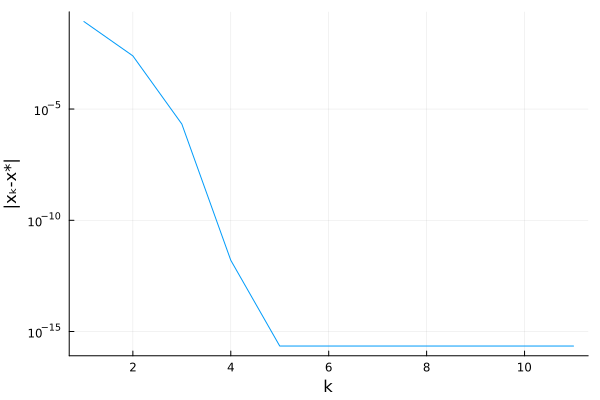

In [9]:
### BEGIN SOLUTION
plot(abs.(Babylonian(2) .- ‚àö2), yaxis=:log10, xlabel="k", ylabel="|x‚Çñ-x*|", label="")
### END SOLUTION

   L'id√©e de la suite de l'exercice est d'appliquer la fonction `Babylonian` d√©finie plus haut √† un argument `a` non pas de type `Float64` mais d'un nouveau type permettant d'estimer √† la fois la valeur de $\sqrt{a}$ mais √©galement de la d√©riv√©e de $a\mapsto\sqrt{a}$ soit $\frac{1}{2\sqrt{a}}$. Pour cela, on introduit de nouveaux nombres qu'on appelle **nombres duaux**. Ceux-ci sont d√©finis √† l'instar des nombres complexes √† partir de la d√©finition d'un nombre particulier not√© $\varepsilon$ de sorte qu'un nombre dual s'√©crit $x=a+b\varepsilon$ avec $a$ et $b$ r√©els. En quelque sorte $\varepsilon$ joue un r√¥le analogue au $i$ complexe √† la diff√©rence que l'on pose ici $\varepsilon^2=0$. L'objectif de tels nombres est d'√™tre en mesure de stocker √† la fois la valeur d'une fonction mais √©galement sa d√©riv√©e en posant

   <a id="fdual"></a>
   $$
   \tag{2}
   f(a+b\varepsilon)=f(a)+f'(a)b\varepsilon
   $$

   ce qui entra√Æne que la d√©riv√©e en $a$ de $f$ peut √™tre obtenue en r√©cup√©rant la composante sur $\varepsilon$ de $f(a+\varepsilon)$ (i.e. en prenant $b=1$).

   En pratique, il est donc n√©cessaire de red√©finir le comportement des fonctions usuelles en coh√©rence avec <a href="#fdual">(2)</a>. Toutefois dans l'application actuelle, seules les op√©rations `+`, `-`, `*` et `/` seront n√©cessaires et donc devront √™tre surcharg√©es pour pouvoir prendre comme arguments des nombres duaux. En outre, il sera √©galement n√©cessaire d'impl√©menter les fonctions `convert` pour convertir un r√©el en nombre dual et `promote_rule` pour exprimer le fait qu'en pr√©sence d'une op√©ration impliquant deux nombres dont l'un est dual, les deux doivent d'abord √™tre exprim√©s sous forme de nombres duaux avant de lancer l'op√©ration. AÃÄ noter que la surcharge des op√©rateurs et fonctions de base n'est possible que si ceux-ci sont explicitement import√©s √† l'aide par exemple de `import Base: +, -, ...`. Il est √©galement possible de d√©finir la fonction `Base.show` de mani√®re √† ce que l'affichage d'un nombre dual ait explicitement la forme `a+b…õ`.

   La surcharge des op√©rateurs s'exprime math√©matiquement par
   $$
   \begin{align*}
   (a+b\varepsilon)+(c+d\varepsilon)&=(a+c)+(b+d)\varepsilon\\
   (a+b\varepsilon)-(c+d\varepsilon)&=(a-c)+(b-d)\varepsilon\\
   (a+b\varepsilon)*(c+d\varepsilon)&=ac+(bc+ad)\varepsilon\\
   (a+b\varepsilon)/(c+d\varepsilon)&=\frac{a}{c}+\frac{bc-ad}{c^2}\varepsilon
   \end{align*}
   $$

   Alternativement √† cette derni√®re op√©ration, on peut aussi d√©finir $\mathrm{inv}(a+b\varepsilon)=\frac{1}{a}-\frac{b}{a^2}\varepsilon$ puis `u/v=u*inv(v)`.

3. EÃÅtudier le `struct D` d√©fini ci-dessous pour repr√©senter un nombre dual ainsi que les lignes de code associ√©es. Compl√©ter les parties de code manquantes, √† savoir les impl√©mentations de `/` et `inv`.




In [10]:
import Base: +, -, *, /, inv, isapprox, convert, promote_rule
using LinearAlgebra

struct D <: Number
    f::Tuple{Float64, Float64}
end
D(a::Real, b::Real) = D((a, b))
+(x::D, y::D) = D(x.f .+ y.f)
-(x::D, y::D) = D(x.f .- y.f)
*(x::D, y::D) = D(x.f[1]*y.f[1], x.f[2]*y.f[1] + x.f[1]*y.f[2])
### BEGIN SOLUTION
/(x::D, y::D) = D(x.f[1]/y.f[1], (y.f[1]*x.f[2] - x.f[1]*y.f[2])/y.f[1]^2)
inv(x::D) = D(1/x.f[1], -x.f[2]/x.f[1]^2)
### END SOLUTION
-(x::D) = D(.-(x.f))
isapprox(x::D, y::D; kwargs...) = all(isapprox.(x.f, y.f ; kwargs...))
convert(::Type{D}, x::Real) = D((x,zero(x)))
promote_rule(::Type{D}, ::Type{<:Real}) = D
Base.show(io::IO,x::D) = print(io,x.f[1],x.f[2]<0 ? " - " : " + ",abs(x.f[2])," Œµ")

# Construction d'un nombre dual
x = D(0.1, -1.6)

0.1 - 1.6 Œµ

4. D√©finir une instance du nombre `…õ` (\varepsilon puis touche TAB pour afficher Œµ), en d'autres termes le nombre `0+1…õ` et effectuer quelques op√©rations pour v√©rifier les impl√©mentations (utiliser la macro `@show` pour afficher un nombre dual), par exemple

   ```julia
   @show (1+2…õ)*(3+4…õ)
   @show 1/(1+…õ)
   @show (1+2…õ)/(2-…õ)
   ```

In [27]:
### BEGIN SOLUTION
Œµ = D((0,1))
@show (1+2…õ)*(3+4…õ)
@show 1/(1+…õ)
@show (1+2…õ)/(2-…õ)
### END SOLUTION

(1 + 2Œµ) * (3 + 4Œµ) = 3.0 + 10.0 Œµ
1 / (1 + Œµ) = 1.0 - 1.0 Œµ
(1 + 2Œµ) / (2 - Œµ) = 0.5 + 1.25 Œµ


0.5 + 1.25 Œµ

In [12]:
@assert (1+2…õ)*(3+4…õ) == 3+10…õ "erreur"
@assert 1/(1+…õ) == 1-…õ "erreur"
@assert (1+2…õ)/(2-…õ) == 1/2+5…õ/4 "erreur"

### BEGIN HIDDEN TESTS
a, b, c, d = rand(4)
@assert 1/(a+b*…õ) == inv(a+b*…õ) == 1/a-b/a^2*Œµ
@assert (a+b*…õ)/(c+d*…õ) == a/c + (b*c-a*d)/c^2*Œµ
### END HIDDEN TESTS

5. Exploiter la structure de nombre dual pour estimer la d√©riv√©e de la fonction racine √† partir de la m√©thode babylonienne (en exploitant directement la fonction `Babylonian` sans la r√©√©crire).

In [13]:
function derivative_sqrt(a; n = 10)
    ### BEGIN SOLUTION
    return Babylonian(a+Œµ)[end].f[2]
    ### END SOLUTION
end

derivative_sqrt (generic function with 1 method)

In [14]:
for a in (0.1, 2, 25, 100)
    @assert derivative_sqrt(a) ‚âà 1/2‚àöa
end

6. Superposer sur un graphe la d√©riv√©e de la racine obtenue par la m√©thode babylonienne sur nombre dual et l'expression analytique.

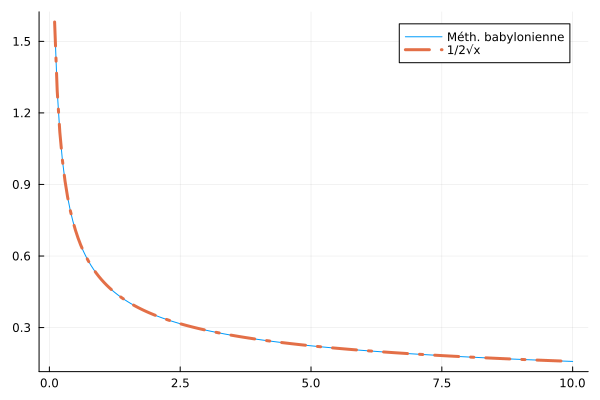

In [15]:
### BEGIN SOLUTION
xplot = LinRange(0.1,10,200)
plot(xplot, x -> Babylonian(x+Œµ)[end].f[2], label="M√©th. babylonienne")
plot!(xplot, x -> 1/2‚àöx, linestyle=:dashdot, linewidth=3, label="1/2‚àöx")
### END SOLUTION

7. Proposer une m√©thode analogue pour calculer la racine $p^\textrm{√®me}$ d'un nombre $a$ i.e. $\sqrt[p]{a}$. V√©rifier que la d√©riv√©e de la racine $p^\textrm{√®me}$ peut √©galement √™tre obtenue par exploitation des nombres duaux sans ligne de code suppl√©mentaire.

In [16]:
function nthrt(a, p=2; x=1, n=100)
    ### BEGIN SOLUTION
    for i = 1:n x = ((p-1)*x+a/x^(p-1))/p end
    return x
    ### END SOLUTION
end

nthrt (generic function with 2 methods)

In [17]:
for a in (0.1, 2, 25, 100), p in (2, 3, 5)
    @assert nthrt(a+Œµ, p) ‚âà a^(1/p) + a^(1/p-1)/p*Œµ  "erreur pour (a,p)=($a,$p)"
end

--------------------
--------------------
--------------------

### <font color='orange'>[Exercice 3]</font> Extension de la diff√©rentiation automatique au second ordre et √† plusieurs variables : application √† une m√©thode des moindres carr√©s non lin√©aire

L'objectif de cet exercice est d'√©tendre le concept de diff√©rentiation automatique au cas d'une fonction scalaire de plusieurs variables au second ordre, autrement dit de permettre le calcul du gradient et de la hessienne en $a$ de la fonction deux fois diff√©rentiable $f: Œ©‚äÇ\mathbb{R}^N ‚Üí \mathbb{R}$.

En partant de son d√©veloppement de Taylor √† l'ordre 2

<a id="fvecdual"></a>
$$
\tag{3}
x‚ÇÄ, \varepsilon \in \mathbb{R}^N,\quad
f(x‚ÇÄ+\varepsilon)=f(x‚ÇÄ)+‚àáf(x‚ÇÄ)^T\varepsilon+\frac{1}{2}\varepsilon^T‚àá¬≤f(x‚ÇÄ)\varepsilon+‚Ñ¥(\varepsilon¬≤)
\quad\textrm{avec}\quad
f(x‚ÇÄ)‚àà\mathbb{R},\,‚àáf(x‚ÇÄ)‚àà\mathbb{R}^N,\,‚àá¬≤f(x‚ÇÄ)‚àà\mathbb{R}^{N√óN}
$$

on a l'id√©e d'introduire une nouvelle classe de nombres <u>scalaires</u> form√©s par un triplet constitu√© d'un scalaire $a$, d'un vecteur $b$ et d'une matrice carr√©e sym√©trique $c$ et d'√©crire

<a id="vecdual"></a>
$$
\tag{4}
x=a+b^T\varepsilon+\frac{1}{2}\mathrm{Tr}(cŒ∑)
$$

o√π $\varepsilon$ et $Œ∑$ sont ici respectivement un vecteur de $\mathbb{R}^N$ et une matrice de $\mathbb{R}^{N√óN}$ telles que $\varepsilon\varepsilon^T=Œ∑$, $Œ∑\varepsilon=0$ et $Œ∑¬≤=0$. On peut ainsi faire l'√©conomie de $Œ∑$ dans <a href="#vecdual">(4)</a> et r√©√©crire tout nombre $x$ sous la forme

<a id="vecdual2"></a>
$$
\tag{5}
x=a+b^T\varepsilon+\frac{1}{2}\varepsilon^Tc\varepsilon
$$

Une telle famille de nombres est repr√©sent√©e ci-dessous par un `struct DD{N} <: Number` (o√π `N` permet de param√©triser ce nouveau type par la dimension $N$ et `<: Number` indique que le type d√©rive du type abstrait `Number` donnant un sens aux op√©rations usuelles) contenant les donn√©es membres `val`, `grad` et `hess` d√©signant respectivement $a$, $b$ et $c$ dans la d√©composition <a href="#vecdual2">(5)</a>. A noter que 3 constructeurs sont d√©finis pour ce type

- `DD(val, grad, hess)` d√©finit un nombre `DD` √† partir de ses 3 donn√©es membres `val`, `grad` et `hess`. Il n'est pas utile de pr√©ciser `N` car la dimension est d√©duite de `length(grad)`.

- `DD(val, grad)` d√©finit un nombre `DD` √† partir de `val` et `grad` et fixe `hess` √† la matrice nulle de dimension coh√©rente avec celle de `grad`.

- `DD{N}(val)` d√©finit un nombre `DD` √† partir de `val` uniquement. Il est alors n√©cessaire de pr√©ciser dans la construction la valeur de `N` qui ne peut se d√©duire de `val`. `grad` et `hess` sont alors initialis√©s √† des valeurs nulles de dimension coh√©rente avec `N`.


Il est naturel de surcharger les op√©rateurs de base de la fa√ßon suivante

$$
\begin{align*}
\left(a+b^T\varepsilon+\frac{1}{2}\varepsilon^Tc\varepsilon\right)+\left(a'+b'^T\varepsilon+\frac{1}{2}\varepsilon^Tc'\varepsilon\right)&=(a+a')+(b+b')^T\varepsilon+\frac{1}{2}\varepsilon^T(c+c')\varepsilon\\
\left(a+b^T\varepsilon+\frac{1}{2}\varepsilon^Tc\varepsilon\right)-\left(a'+b'^T\varepsilon+\frac{1}{2}\varepsilon^Tc'\varepsilon\right)&=(a-a')+(b-b')^T\varepsilon+\frac{1}{2}\varepsilon^T(c-c')\varepsilon\\
\left(a+b^T\varepsilon+\frac{1}{2}\varepsilon^Tc\varepsilon\right)*\left(a'+b'^T\varepsilon+\frac{1}{2}\varepsilon^Tc'\varepsilon\right)&=(aa')+(ab'+a'b)^T\varepsilon+\frac{1}{2}\varepsilon^T(ac'+a'c+bb'^T+b'b^T)\varepsilon
\end{align*}
$$

On choisit par ailleurs de construire l'op√©rateur de division √† partir de la d√©finition pr√©alable de la function d'inversion `inv`. Compl√©ter le code de la fonction `inv(x::DD{N}) where {N}`.



1. EÃÅtablir √† la main l'expression des donn√©es membres `val` et `grad` et fixe `hess` de l'inverse d'un nombre de type `DD{N}` par identification en √©crivant que la mutiplication d'un nombre par son inverse correspond √† `val=1`, `grad=0` et `hess=0`. Compl√©ter la surcharge des op√©rateurs `-` et `*` ainsi que le code de la fonction `inv(x::DD{N}) where {N}`.
    
   Remarque : la syntaxe `where {N}` rappelle simplement que `N` est un param√®tre qui sera remplac√© √† la compilation par la valeur voulue.

In [18]:
import Base: +, -, *, /, inv, conj, ==, convert, promote_rule

struct DD{N} <: Number
    val::Float64
    grad::Vector{Float64}
    hess::Symmetric{Float64, Matrix{Float64}}
    DD(val::Real, grad, hess) = new{length(grad)}(val, grad, Symmetric(hess))
    DD(val::Real, grad) = new{length(grad)}(val, grad, Symmetric(zeros(length(grad),length(grad))))
    DD{N}(val::Real) where {N} = new{N}(val, zeros(N), Symmetric(zeros(N,N)))
end
val(x::DD{N}) where {N} = x.val
grad(x::DD{N}) where {N} = x.grad
hess(x::DD{N}) where {N} = x.hess
conj(x::DD{N}) where {N} = DD(conj(x.val),conj(x.grad),conj(x.hess))
+(x::DD{N}, y::DD{N}) where {N} = DD(x.val+y.val,x.grad+y.grad,x.hess+y.hess)
### BEGIN SOLUTION
-(x::DD{N}, y::DD{N}) where {N} = DD(x.val-y.val,x.grad-y.grad,x.hess-y.hess)
*(x::DD{N}, y::DD{N}) where {N} = DD(x.val*y.val,
                                  x.val*y.grad+y.val*x.grad,
                                  x.val*y.hess+y.val*x.hess+x.grad*y.grad'+y.grad*x.grad')
inv(x::DD{N}) where {N} = (x‚Åª¬π = inv(x.val) ; x‚Åª¬≤ = x‚Åª¬π^2 ; x‚Åª¬≥ = x‚Åª¬π^3 ; DD(x‚Åª¬π, -x‚Åª¬≤*x.grad, x‚Åª¬≥*(2x.grad*x.grad'-x.val*x.hess)))
### END SOLUTION
/(x::DD{N}, y::DD{N}) where {N} = x*inv(y)
==(x::DD{N}, y::DD{N}) where {N} = x.val == y.val && x.grad == y.grad && x.hess == y.hess
convert(::Type{DD{N}}, x::Real) where {N} = DD{N}(x)
promote_rule(::Type{DD{N}}, ::Type{<:Real}) where {N} = DD{N}
Base.show(io::IO,x::DD{N}) where {N} = print(io,x.val," + ",x.grad,"^TùõÜ"," + ¬Ω ùõÜ^T",x.hess,"ùõÜ")

En dimension $N=2$, on peut introduire les deux nombres

   ```julia
   ŒµÀ£ = DD(0,[1,0])
   Œµ ∏ = DD(0,[0,1])
   ```

Pour bien comprendre le fonctionnement de ces nombres, il peut √™tre utile de v√©rifier √† la main les calculs de `1+ŒµÀ£`, `1+ŒµÀ£+Œµ ∏`, `(1+ŒµÀ£)*(2+3Œµ ∏)` et `ŒµÀ£/(1+ŒµÀ£+Œµ ∏)` contr√¥l√©s par les `@assert` ci-dessous. Par exemple

$$
Œµ^x Œµ^y=\frac{1}{2} \begin{pmatrix}Œµ^x \\ Œµ^y\end{pmatrix}^T \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}\begin{pmatrix}Œµ^x \\ Œµ^y\end{pmatrix}
‚üπ
\left(0, \begin{pmatrix}1 \\ 0\end{pmatrix}, \begin{pmatrix}0 & 0 \\ 0 & 0\end{pmatrix}\right)
*
\left(0, \begin{pmatrix}0 \\ 1\end{pmatrix}, \begin{pmatrix}0 & 0 \\ 0 & 0\end{pmatrix}\right)
=
\left(0, \begin{pmatrix}0 \\ 0\end{pmatrix}, \begin{pmatrix}0 & 1 \\ 1 & 0\end{pmatrix}\right)
$$

In [19]:
ŒµÀ£ = DD(0,[1,0])
Œµ ∏ = DD(0,[0,1])
@assert 1+ŒµÀ£ == DD(1, [1, 0], zeros(2,2))
@assert ŒµÀ£*Œµ ∏ == DD(0, [0, 0], [0  1; 1  0])
@assert 1+2ŒµÀ£-3Œµ ∏ == DD(1, [2, -3], zeros(2,2))
@assert (1+ŒµÀ£)*(2+3Œµ ∏) == DD(2, [2, 3], [0  3; 3  0])
@assert ŒµÀ£/(1+ŒµÀ£+Œµ ∏) == DD(0, [1, 0], [-2 -1; -1  0])
;

2. Obtenir le gradient `gradf` et la hessienne `hessf` de $f(x,y)=\frac{(x+2y)^2}{2}$ par diff√©rentiation automatique au point $(x_0,y_0)=(3,1)$. On pourra pour cela exploiter `f(x‚ÇÄ+ŒµÀ£, y‚ÇÄ+Œµ ∏)`.

In [20]:
### BEGIN SOLUTION
f(x,y) = (x+2y)^2/2
dualf = f(3+ŒµÀ£,1+Œµ ∏)
gradf, hessf = grad(dualf), hess(dualf)
### END SOLUTION

([5.0, 10.0], [1.0 2.0; 2.0 4.0])

In [21]:
@assert gradf == [5, 10]
@assert hessf == [1 2; 2 4]

3. Ecrire une fonction `opdiff` qui prend en argument une fonction scalaire `f` d√©pendant de plusieurs variables ainsi qu'un vecteur `x` et qui retourne le triplet `f(x), ‚àáf(x), ‚àá¬≤f(x)`. Attention on suppose que la signature de `f` d√©pend explicitement de plusieurs variables scalaires `f(x‚ÇÅ, x‚ÇÇ, ..., x‚Çô)` plut√¥t que d'une variable vectorielle √©tant entendu que l'application sur un vecteur peut √™tre r√©alis√© gr√¢ce √† l'op√©rateur "splat" `f(x...)`.

    <details>
        <summary>
            <em><font color='gray'>Aide (cliquer pour afficher)</font></em>
        </summary>
    
    - Se convaincre √† partir de la question pr√©c√©dente que le calcul demand√© r√©sulte de celui de `f(x‚ÇÅ+…õ‚ÇÅ, x‚ÇÇ+…õ‚ÇÇ, ..., x‚Çô+…õ‚Çô)` o√π les `…õ·µ¢` sont les composantes de la partie `grad` d'un nombre de type `DD` d√©fini par 
        ```julia
        Œµ = [DD(0,(1:n .== i)) for i in 1:n]
        ```

    - Visualiser ce que donne `Œµ` quand `n` vaut 3 par exemple.
    </details>


In [22]:
function opdiff(f, x)
    ### BEGIN SOLUTION
    N = length(x)
    dualx = x + [DD(0,(1:N .== i)) for i in 1:N]
    dualf = f(dualx...)
    return val(dualf), grad(dualf), hess(dualf)
    ### END SOLUTION
end

opdiff (generic function with 1 method)

In [23]:
@assert all(opdiff((x,y)->(x+2y)^2/2, [3,1]) == (12.5, [5, 10], [1 2; 2 4]))

function test_diff(n)
    a, b, c, X = rand(), rand(n), Symmetric(rand(n,n)), rand(n)
    f(X...) = begin let a=a, b=b, c=c end ; V=collect(X) ; return a + b'*V + 1/2 * V'*c*V end
    v, g, h = opdiff(f, X)
    return all((v ‚âà f(X...), g ‚âà b + c*X, h ‚âà c))
end

for n in (1, 10, 20)
    @assert test_diff(n) "erreur pour n=$n"
end

4. On souhaite maintenant r√©aliser un programme permettant de minimiser une fonction $J$ arbitraire d√©pendant de plusieurs variables

   $$
   \min_{(p_1,\ldots,p_n)\in\mathbb{R}^n} J(p_1,\ldots,p_n)
   $$

   On suppose que le probl√®me revient √† chercher un vecteur de param√®tres annulant son gradient par la m√©thode de Newton-Raphson. Autrement dit √† chaque √©tape il est n√©cessaire d'√©valuer le gradient ainsi que la hessienne de $J$
   
   $$
   p^{k+1}=p^{k}-‚àá¬≤J(p^{k})^{-1}‚àáJ(p^{k})
   $$
   
   EÃÅcrire une fonction g√©n√©rique `minimizer` prenant comme entr√©es une fonction `J`, un vecteur de param√®tres initiaux `p`, un nombre maximal d'it√©rations `maxiter` (par d√©faut `100`)  et un param√®tre d'arr√™t `œµ` (par d√©faut `1.e-15`). On consid√©rera un algorithme de Newton-Raphson dans lequel les op√©rateurs diff√©rentiels sont calcul√©s par diff√©rentiation automatique et on prendra un crit√®re d'arr√™t $\lVert ‚àáJ(p^{k})\rVert<œµ$. Il pourra √™tre judicieux √† des fins de d√©bogage d'introduire un argument suppl√©mentaire bool√©en appel√© `verbose` qui, s'il est √©gal √† `true`, implique l'affichage de valeurs interm√©diaires du code (les informations √† afficher sont naturellement √† coder dans `minimizer` dans une s√©quence de type `if verbose println(...) end`).

In [24]:
function minimizer(J::Function, p, maxiter = 100; œµ = 1.e-15, verbose = true)
    ### BEGIN SOLUTION
    n = length(p)
    iter = 0
    for i in 1:maxiter
        _, g, h = opdiff(J, p)
        p -= h\g
        iter += 1
        if verbose println("Iter $(iter) ; p=$(p) ; gradJ=$(g)") end
        norm(g) < œµ && return p
    end
    ### END SOLUTION
    return "Failed to converge!"
end

minimizer (generic function with 2 methods)

5. Application n¬∞1.

   On dispose de $n$ points $(x_i, y_i)$ d'une fonction inconnue $y = f(x)$.
   
   ```julia
   x = [0.0; 0.1; 0.2; 0.3; 0.4; 0.5; 0.6; 0.7; 0.8; 0.9; 1.0]
   y = [0.6761488864859304; 0.6345697680852508; 0.6396283580587062; 0.6132010027973919;
      0.5906142598705267; 0.5718728461471725; 0.5524549902830562; 0.538938885654085;
      0.5373495476994958; 0.514904589752926; 0.49243437874655027]
   ```
   
   On souhaite approximer $f$ par une fonction de la forme

   $$
   \widetilde f(x) = \frac{a}{b + x}
   $$
   en minimisant
   $$
   \sum_{i=1}^{n} |\widetilde f(x_i) - y_i|^2
   $$

   EÃÅcrire un code formant la fonction √† minimiser et appliquer `minimizer` pour obtenir la meilleure approximation $\widetilde f$. Tracer sur le m√™me graphe les points donn√©s et la fonction approximante.

Iter 1 ; p=[0.350047275534061, 0.5137548929772087] ; gradJ=[2.201267606142057, -1.8777320453861037]
Iter 2 ; p=[0.49137914987434056, 0.5445008323365691] ; gradJ=[-3.9343634064126656, 1.3692731672981502]
Iter 3 ; p=[0.6778233306255093, 0.8027374567015065] ; gradJ=[-0.30476451750426087, -0.44529695032544503]
Iter 4 ; p=[0.8876978956611383, 1.122727125296048] ; gradJ=[0.0029325771558549873, -0.26743830179702943]
Iter 5 ; p=[1.1238443337438482, 1.50390161481891] ; gradJ=[0.051621549277688236, -0.14006026724256454]
Iter 6 ; p=[1.3798518105662807, 1.9301752535231915] ; gradJ=[0.03899804538043408, -0.06654431083137657]
Iter 7 ; p=[1.6309589293718458, 2.3552367203818845] ; gradJ=[0.021219176630635182, -0.0288480335907029]
Iter 8 ; p=[1.8293305573546037, 2.6939769498958834] ; gradJ=[0.009310630818782119, -0.01099209925161436]
Iter 9 ; p=[1.928372800586006, 2.8638916906780625] ; gradJ=[0.0030150633112978045, -0.003231456898782631]
Iter 10 ; p=[1.9476487198372296, 2.897044423690885] ; gradJ=[0.00

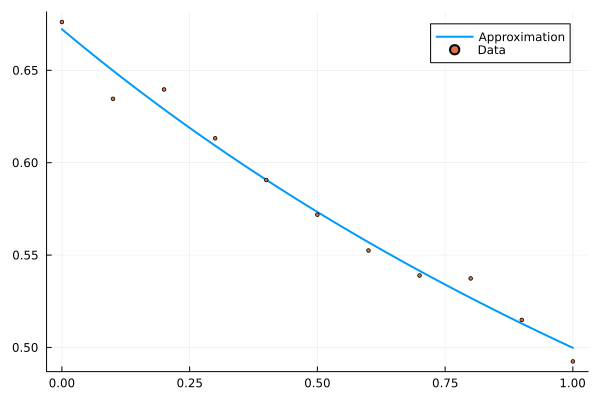

In [25]:
x = [0.0; 0.1; 0.2; 0.3; 0.4; 0.5; 0.6; 0.7; 0.8; 0.9; 1.0]
y = [0.6761488864859304; 0.6345697680852508; 0.6396283580587062; 0.6132010027973919;
     0.5906142598705267; 0.5718728461471725; 0.5524549902830562; 0.538938885654085;
     0.5373495476994958; 0.514904589752926; 0.49243437874655027]
### BEGIN SOLUTION
f(a,b) = x -> a / (b+x)
J(a,b) = sum((f(a,b).(x) .- y).^2)
p = minimizer(J, [1,1])
xplot = LinRange(extrema(x)...,200)
Plots.plot(xplot, f(p...), label="Approximation", linewidth=2)
Plots.scatter!(x, y, markersize=2, label="Data")
### END SOLUTION

6. Application n¬∞2.

   On se donne $n$ nouveaux points $(x_i, y_i)$ d'une fonction inconnue $y = f(x)$
   
    ```julia
   x = [0.0; 0.1; 0.2; 0.3; 0.4; 0.5; 0.6; 0.7; 0.8; 0.9; 1.0]
   y = [-0.9187980789440975; -0.6159791344678258; -0.25568734869121856;
      -0.14269370171581808; 0.3094396057228459; 0.6318327173549161;
      0.8370437988106428; 1.0970402798788812; 1.6057799131867696;
      1.869090784869698; 2.075369730726694]
   ```  
   
   et on souhaite approximer $f$ par une fonction affine

   $$
   \widetilde f(x) = ax+b
   $$

   en minimisant la somme des distances euclidiennes entre les points et la droite d√©finie par $\widetilde f$. Etant donn√© que la distance entre un point $(x_i,y_i)$ et la ligne droite est donn√©e par

   $$
   \frac{\lvert y_i - a x_i - b \rvert}{\sqrt{1+a^2}}
   $$

   la fonction objectif √† minimiser s'√©crit

   $$
   J(a, b) := \sum_{i=1}^{n} \frac{ \left( y_i - a x_i - b \right)^2 }{1+a^2}
   $$

   Trouver les param√®tres optimaux $a$ et $b$ √† l'aide de `minimizer` et tracer la droite ainsi que les points.

Iter 1 ; p=[1.0075555434380665, 0.09331778572184546] ; gradJ=[-4.126387371653923, 10.007561433268513]
Iter 2 ; p=[1.582967866897024, -0.19730704835843071] ; gradJ=[-4.4809594275921665, 0.07504342925521845]
Iter 3 ; p=[2.0932414662616434, -0.45457646030837634] ; gradJ=[-1.5251348351481098, 0.024820199252327355]
Iter 4 ; p=[2.552507163981802, -0.6853807383742772] ; gradJ=[-0.5373702030282352, 0.007450650886929703]
Iter 5 ; p=[2.887732653452152, -0.8534963621250207] ; gradJ=[-0.17228722774104155, 0.0019061700510825434]
Iter 6 ; p=[3.0360521221804633, -0.9277907726161118] ; gradJ=[-0.04228469642374015, 0.0003492973340746254]
Iter 7 ; p=[3.0591728178404582, -0.9393645341617476] ; gradJ=[-0.005080598894956569, 2.928403949506539e-5]
Iter 8 ; p=[3.0596590334740172, -0.9396078287986602] ; gradJ=[-0.00010265416035439836, 3.96892253319013e-7]
Iter 9 ; p=[3.0596592430153318, -0.9396079336229851] ; gradJ=[-4.423060325116357e-8, 1.1394944080523826e-10]
Iter 10 ; p=[3.059659243015371, -0.939607933623

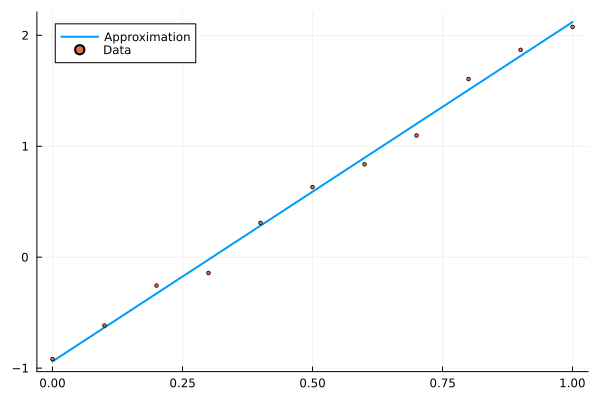

In [26]:
x = [0.0; 0.1; 0.2; 0.3; 0.4; 0.5; 0.6; 0.7; 0.8; 0.9; 1.0]
y = [-0.9187980789440975; -0.6159791344678258; -0.25568734869121856;
     -0.14269370171581808; 0.3094396057228459; 0.6318327173549161;
     0.8370437988106428; 1.0970402798788812; 1.6057799131867696;
     1.869090784869698; 2.075369730726694]
### BEGIN SOLUTION
f(a,b) = x -> a*x+b
J(a,b) = sum((f(a,b).(x) .- y).^2)/(1+a^2)
p = minimizer(J, [1,1])
xplot = LinRange(extrema(x)...,200)
Plots.plot(xplot, f(p...), label="Approximation", linewidth=2)
Plots.scatter!(x, y, markersize=2, label="Data")
### END SOLUTION